# Imports

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [149]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
df = pd.read_csv('./data/cleaned_posts.csv')

In [88]:
X = df['title']
y = df['subreddit']

In [89]:
X

0        CONFIRMED: The Matrix Resurrections will NOT b...
1        They used the Pirate Bay logo as the backgroun...
2        In Avengers age of Ultron, Hawkeye finishes ki...
3        In Cabin in the Woods (2012) a scientist is ki...
4        Peter Jackson, in his Lord Of The Rings film t...
                               ...                        
11186    Probably already been mentioned, but I only pi...
11187    In Star Wars: Episode 1 - The Phantom Menace, ...
11188    From Spider-Man: Into The Spider-Verse (2019):...
11189    From Spider-Man: Into The Spider-Verse (2019):...
11190    In Logan (2017), Logan berates Laura for readi...
Name: title, Length: 11191, dtype: object

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y,
                                                   test_size = .3,
                                                   random_state=42)

In [91]:
cvec = CountVectorizer(max_df=.9)

In [92]:
X_train = cvec.fit_transform(X_train)
features = cvec.get_feature_names()

In [93]:
X_test = cvec.transform(X_test)

In [94]:
X_test.shape

(3358, 18358)

In [95]:
X_train.shape

(7833, 18358)

# Helper Functions

In [96]:
def get_clasisification_metrics(model, X_test, y_test):
    
    """
    Method used to create a classification matrix along with calculated classification metrics
    """
    
    preds = model.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    
    plot_confusion_matrix(gs, X_test, y_test, 
                          cmap='Blues', 
                          values_format = 'd')
    
    print(f'Accuracy: {(tp + tn)/(tp+tn+fp+fn)}')
    print(f'Specificity: {(tn)/(tn+fp)}')
    print(f'Precision: {(tp)/(tp+fp)}')
    print(f'Recall: {(tp)/(tp+fn)}')
    
    return
    

In [97]:
def markdown_prep(text):
    
    """
    Used to prepare the classification metrics for markdown
    """
    
    text_list = text.split('\n')
    list_items = [f'<li>{line}</li>' for line in text_list]
    string = ""
    for line in list_items:
        string += line
        string += '\n\t'
    print(f"""
    <details>
    <summary> Train Results </summary>
    
    <ul>
        {string}
        
    </details>""")

# Model 1 

Count Vectorizer + MultinomialNB


<details>
<summary> Train Results </summary>

<ul>
    <li>Accuracy: 0.8927613941018767</li>
<li>Specificity: 0.8656902461826114</li>
<li>Precision: 0.9072320275505812</li>
<li>Recall: 0.9115484429065744</li>


</details>

        

<details>
<summary> Test Results </summary>

<ul>
    <li>Accuracy: 0.8025610482430018</li>
<li>Specificity: 0.7354651162790697</li>
<li>Precision: 0.8221787982413288</li>
<li>Recall: 0.8491422805247225</li>


</details>


In [98]:
pipe = Pipeline([
    ('nb', MultinomialNB())
])

In [99]:
pipe_params = {
}

In [100]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 n_jobs = -1)

In [101]:
%%time

gs.fit(X_train, y_train)

Wall time: 1.24 s


GridSearchCV(cv=5, estimator=Pipeline(steps=[('nb', MultinomialNB())]),
             n_jobs=-1, param_grid={})

In [102]:
gs.best_score_

0.7945870325136659

In [103]:
gs.best_params_

{}

Accuracy: 0.9361674964892123
Specificity: 0.8965409784979744
Precision: 0.9306599832915622
Recall: 0.9636678200692042


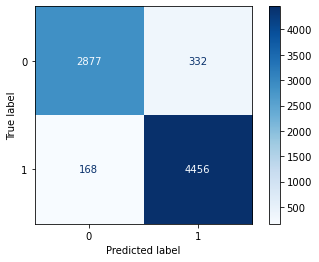

In [104]:
get_clasisification_metrics(gs, X_train, y_train)

Accuracy: 0.8028588445503275
Specificity: 0.6693313953488372
Precision: 0.7959641255605381
Recall: 0.8955600403632694


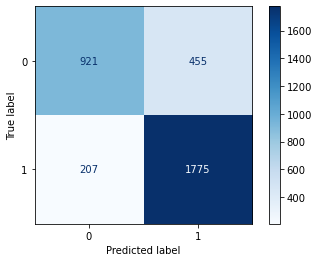

In [105]:
get_clasisification_metrics(gs, X_test, y_test)

# Model 2

TfidVectorizer + MultinomialNB



<details>
<summary> Train Results </summary>

<ul>
    <li>Accuracy: 0.8511426018128431</li>
<li>Specificity: 0.7320037394827049</li>
<li>Precision: 0.8339127076091155</li>
<li>Recall: 0.9338235294117647</li>


</details>

    

<details>
<summary> Train Results </summary>

<ul>
    <li>Accuracy: 0.7754615842763549</li>
<li>Specificity: 0.590843023255814</li>
<li>Precision: 0.7608326253186066</li>
<li>Recall: 0.9036326942482341</li>


</details>


In [106]:
pipe = Pipeline([
    ('nb', MultinomialNB())
])

In [107]:
pipe_params = {
}

In [108]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv=5,
                 n_jobs=-1)

In [109]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('nb', MultinomialNB())]),
             n_jobs=-1, param_grid={})

In [110]:
gs.best_score_

0.7945870325136659

In [111]:
gs.best_params_

{}

Accuracy: 0.9361674964892123
Specificity: 0.8965409784979744
Precision: 0.9306599832915622
Recall: 0.9636678200692042


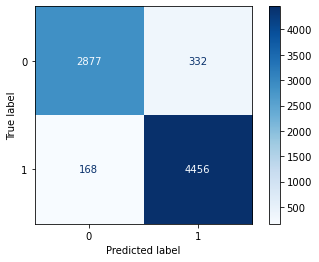

In [112]:
get_clasisification_metrics(gs, X_train, y_train)

Accuracy: 0.8028588445503275
Specificity: 0.6693313953488372
Precision: 0.7959641255605381
Recall: 0.8955600403632694


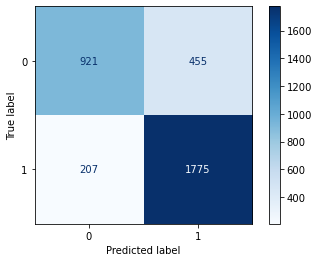

In [113]:
get_clasisification_metrics(gs, X_test, y_test)

# Model 3

LogisticRegression


<details>
<summary> Train Results </summary>

    <ul>
        <li>Accuracy: 0.9184220605132133</li>
    <li>Specificity: 0.8918666251168589</li>
    <li>Precision: 0.9258388544560804</li>
    <li>Recall: 0.9368512110726643</li>
	
        
</details>


<details>
<summary> Test Results </summary>

    <ul>
        <li>Accuracy: 0.8189398451459202</li>
    <li>Specificity: 0.7768895348837209</li>
    <li>Precision: 0.8455734406438632</li>
    <li>Recall: 0.8481331987891019</li>


</details>


In [308]:
pipe = Pipeline([
    ('logreg', LogisticRegression())
])

In [309]:
#I regret putting in this many variables immensely as I sit here staring at my screen
#But I've come too far and I'm stuck in the sunken cost

#I've abandoned ship all is lost
pipe_params = {
    'logreg__penalty': ['l2'],
    'logreg__solver':['saga'],
    'logreg__tol':[.01],
    'logreg__C': np.linspace(1,100,10)
}

In [310]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 n_jobs = -1)

In [311]:
%%time

gs.fit(X_train, y_train)

Wall time: 4.48 s


GridSearchCV(cv=5, estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
                         'logreg__penalty': ['l2'], 'logreg__solver': ['saga'],
                         'logreg__tol': [0.01]})

In [312]:
gs.best_score_

0.8013520397143837

In [313]:
gs.best_params_

{'logreg__C': 1.0,
 'logreg__penalty': 'l2',
 'logreg__solver': 'saga',
 'logreg__tol': 0.01}

In [314]:
gs.best_estimator_

Pipeline(steps=[('logreg', LogisticRegression(solver='saga', tol=0.01))])

In [316]:
logreg = LogisticRegression(solver='saga',tol=0.01)

In [317]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='saga', tol=0.01)

In [354]:
coefs = dict(zip(features,logreg.coef_[0]))

In [357]:
sorted(coefs, key=coefs.get, reverse=True)[:25]

['fact',
 'because',
 'subtle',
 'title',
 'shit',
 'fucking',
 'despite',
 'role',
 'audience',
 'cast',
 'this',
 'hours',
 'franchise',
 'actors',
 'actor',
 'shitty',
 'nothing',
 'sequel',
 'titanic',
 'filming',
 'us',
 'movie',
 'means',
 'protagonist',
 'actually']

In [359]:
sorted(coefs, key=coefs.get)[:25]

['noticed',
 'comments',
 '1998',
 'similar',
 '1987',
 'shirt',
 '1983',
 'credits',
 'comics',
 '2018',
 'throughout',
 'plate',
 '1990',
 'opening',
 'when',
 'during',
 '2017',
 'amp',
 'else',
 'across',
 'behind',
 'two',
 'hand',
 'shot',
 '2003']

Accuracy: 0.9286352610749393
Specificity: 0.907759426612652
Precision: 0.9364397680910458
Recall: 0.9431228373702422


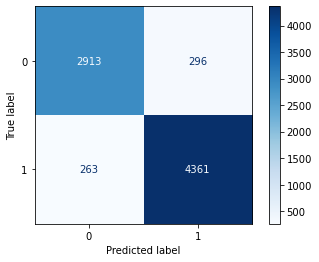

In [120]:
get_clasisification_metrics(gs, X_train, y_train)

Accuracy: 0.8165574746873139
Specificity: 0.7718023255813954
Precision: 0.8425275827482447
Recall: 0.8476286579212916


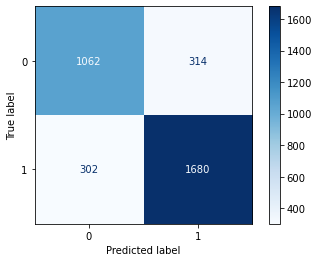

In [121]:
get_clasisification_metrics(gs, X_test, y_test)

# Model 4

RandomForestClassifier


<details>
<summary> Train Results </summary>

<ul>
    <li>Accuracy: 0.9994893399719137</li>
<li>Specificity: 0.999688376441259</li>
<li>Precision: 0.9997836434443964</li>
<li>Recall: 0.9993512110726643</li>


</details>

    
    

<details>
<summary> Test Results </summary>

<ul>
    <li>Accuracy: 0.7876712328767124</li>
<li>Specificity: 0.684593023255814</li>
<li>Precision: 0.796911558259242</li>
<li>Recall: 0.8592330978809284</li>


</details>



In [123]:
pipe = Pipeline([
    ('rf_class', RandomForestClassifier())
])

In [124]:
#I regret putting in this many variables immensely as I sit here staring at my screen
#But I've come too far and I'm stuck in the sunken cost

#I've abandoned ship all is lost
pipe_params = {
    'rf_class__max_depth': [200,400,600],
    'rf_class__min_samples_split': [2,5,10,30]
}

In [125]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 n_jobs = -1)

In [126]:
%%time

gs.fit(X_train, y_train)

Wall time: 1min 46s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf_class', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf_class__max_depth': [200, 400, 600],
                         'rf_class__min_samples_split': [2, 5, 10, 30]})

In [127]:
gs.best_score_

0.7809276741477522

In [128]:
gs.best_params_

{'rf_class__max_depth': 600, 'rf_class__min_samples_split': 10}

Accuracy: 0.9977020298736117
Specificity: 0.9953256466188843
Precision: 0.9967644521138913
Recall: 0.9993512110726643


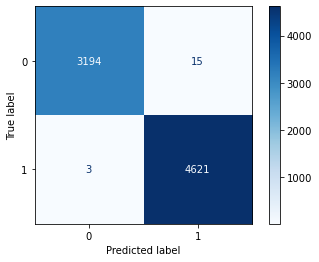

In [129]:
get_clasisification_metrics(gs, X_train, y_train)

Accuracy: 0.7876712328767124
Specificity: 0.6140988372093024
Precision: 0.7722007722007722
Recall: 0.9081735620585267


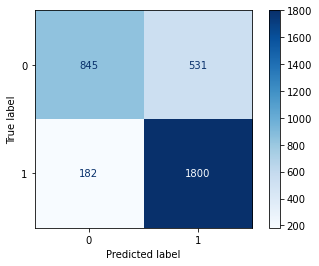

In [130]:
get_clasisification_metrics(gs, X_test, y_test)

# Model 5

AdaBoost

In [142]:
pipe = Pipeline([
    ('abc', AdaBoostClassifier(random_state=42))
])

In [143]:
#I regret putting in this many variables immensely as I sit here staring at my screen
#But I've come too far and I'm stuck in the sunken cost

#I've abandoned ship all is lost
pipe_params = {
    'abc__n_estimators': [200,400,600,800,1000],
}

In [144]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 n_jobs = -1)

In [145]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('abc',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'abc__n_estimators': [200, 400, 600, 800, 1000]})

In [146]:
gs.best_score_

0.7640729411937298

In [148]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9350185114260181, 0.7763549731983324)

# Model 6

XG Boost

In [273]:
pipe = Pipeline([
    ('xgb', XGBClassifier())
])

In [302]:
#I regret putting in this many variables immensely as I sit here staring at my screen
#But I've come too far and I'm stuck in the sunken cost

#I've abandoned ship all is lost
pipe_params = {
    'xgb__booster' : ['gbtree','dart'],
    'xgb__max_depth': [5,10,20,40,80],
}

In [303]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 n_jobs = -1)

In [304]:
gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\dsi-111\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                         

In [305]:
gs.best_score_

0.7893523103016314